In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier

In [4]:
df_train = pd.read_excel('both_data.xlsx', sheet_name= 'train', header=None)
print('Train Data:')
display(df_train.head())
print()
df_test = pd.read_excel('both_data.xlsx', sheet_name= 'test', header=None)
print('Test Data:')
display(df_test.head())


Train Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0



Test Data:


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train_df = df_train.iloc[:, :14]
y_train_df = df_train.iloc[:, 14:]
X_test_df = df_test.iloc[:, :14]
y_test_df = df_test.iloc[:, 14:]

Box Plot of training data:


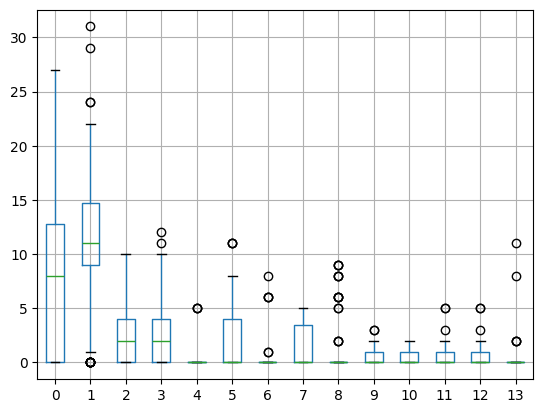

Density Plot of overall training Data:


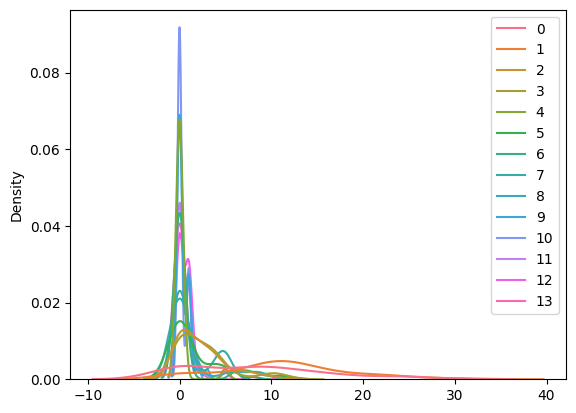

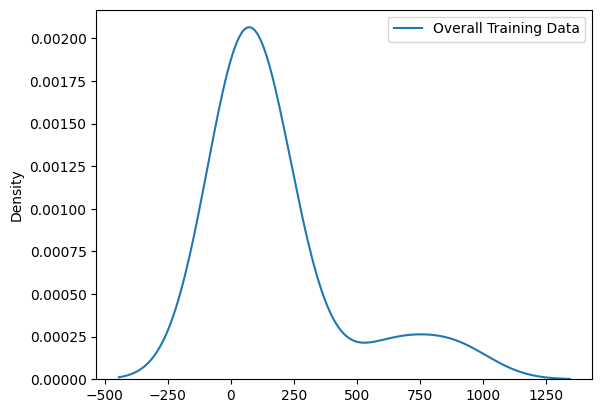

Box Plot of testing data:


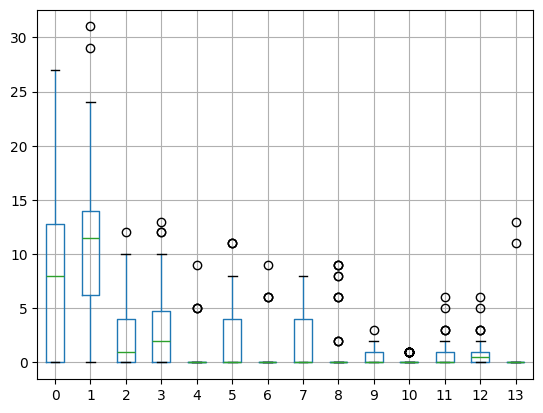

Density Plot of overall test Data:


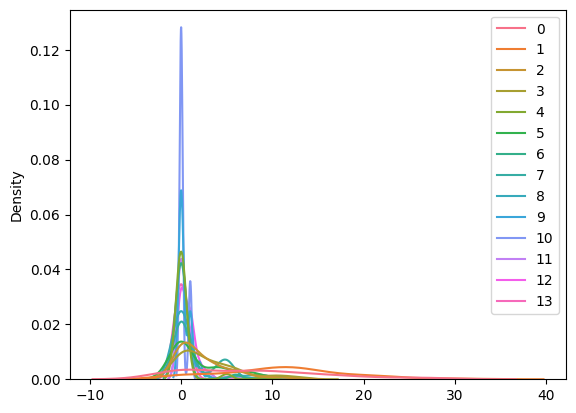

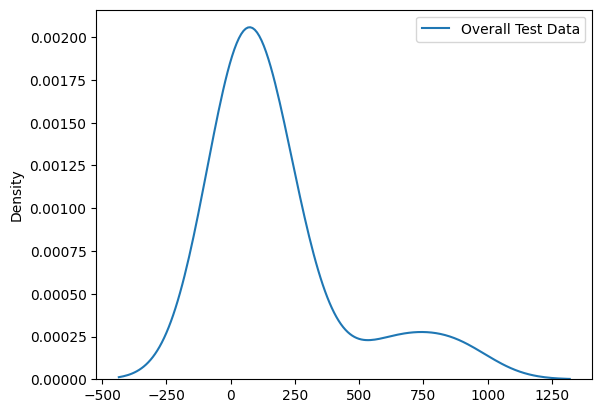

In [6]:
print('Box Plot of training data:')
X_train_df.boxplot()
plt.show()

print('Density Plot of overall training Data:')
sns.kdeplot(X_train_df)
plt.show()

sns.kdeplot(data=X_train_df.sum(), label="Overall Training Data")
plt.legend()
plt.show()

print('Box Plot of testing data:')
X_test_df.boxplot()
plt.show()

print('Density Plot of overall test Data:')
sns.kdeplot(X_test_df)
plt.show()

sns.kdeplot(data=X_test_df.sum(), label="Overall Test Data")
plt.legend()
plt.show()

In [7]:
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

## Normalize testing data
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

Training Data Box Plot


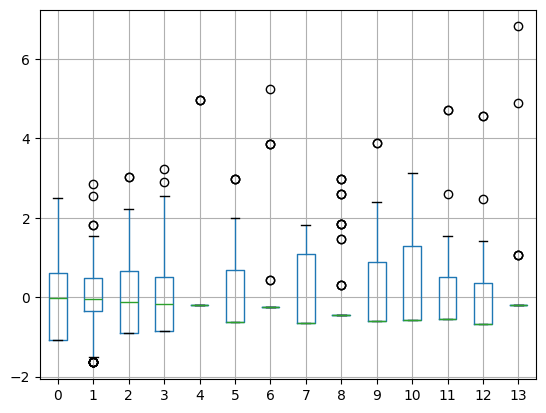

Test Data Box Plot


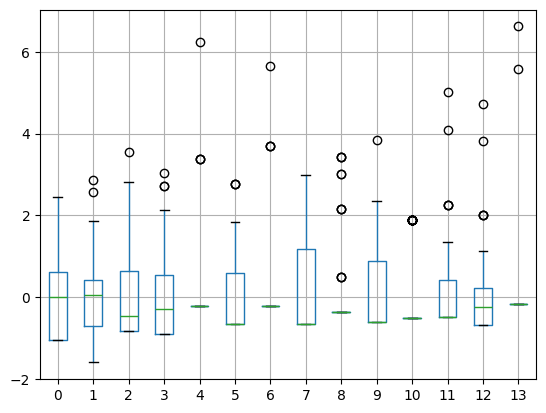

Density overall Plot of overall Normalized Training Data


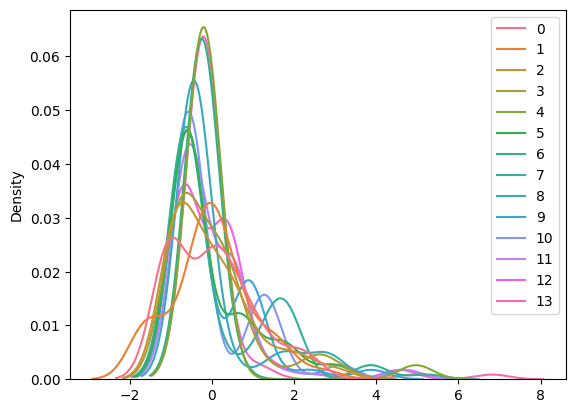

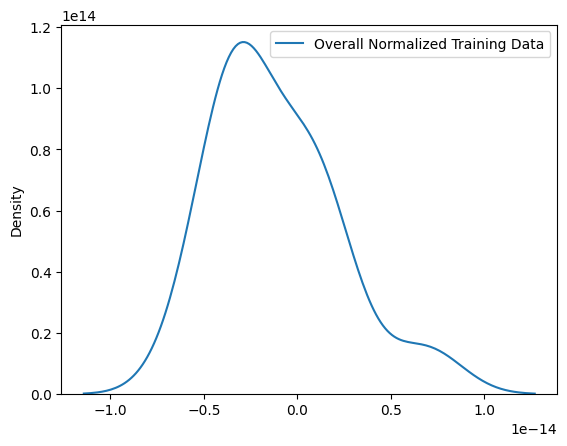

Density overall Plot of overall Normalized Test Data


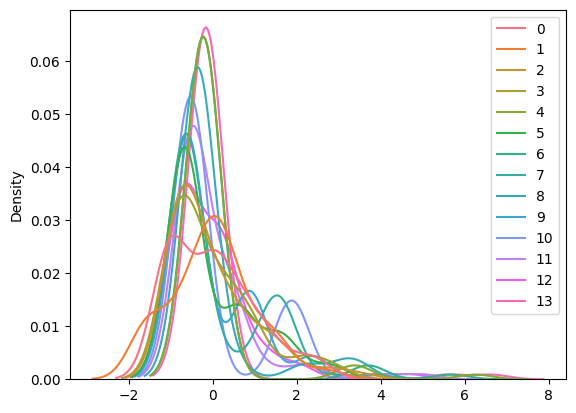

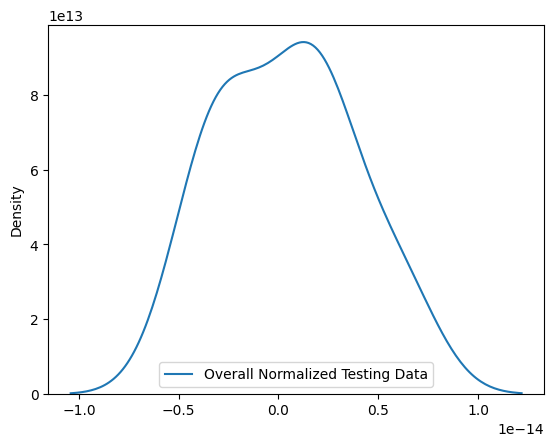

In [89]:
print('Training Data Box Plot')
normalized_X_train_df.boxplot()
plt.show()

print('Test Data Box Plot')
normalized_X_test_df.boxplot()
plt.show()

print('Density overall Plot of overall Normalized Training Data')
sns.kdeplot(normalized_X_train_df)
plt.show()

sns.kdeplot(data = normalized_X_train_df.sum(axis=0), label="Overall Normalized Training Data")
plt.legend(loc='best')
plt.show()

print('Density overall Plot of overall Normalized Test Data')
sns.kdeplot(normalized_X_test_df)
plt.show()

sns.kdeplot(normalized_X_test_df.sum(axis=0), label="Overall Normalized Testing Data")
plt.legend(loc='best')
plt.show()


In [8]:
# Convert dataframes into numpy array
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values 

# Printing dimensions
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

## Training data
count = 1
cls = 1
y_cls = []
for i in range (104):
    if count == 4:
        count = 1
        cls +=1
    else:
        y_cls.append(cls)
        count += 1

y_labeled = np.asarray(y_cls)
print(y_labeled)

[ 1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26]


In [11]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import tensorflow as tf

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(80, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(70, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
    return model

In [12]:

# load dataset
#X, y = get_dataset()
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train , verbose=1, epochs=280)
print(model.metrics_names)



Epoch 1/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5231 - loss: 0.6869  
Epoch 2/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7367 - loss: 0.6389 
Epoch 3/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8270 - loss: 0.5919 
Epoch 4/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8811 - loss: 0.5437 
Epoch 5/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.4894 
Epoch 6/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9131 - loss: 0.4215 
Epoch 7/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9225 - loss: 0.3617 
Epoch 8/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9268 - loss: 0.3037 
Epoch 9/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9346 - loss: 0.2618 
Epoch 10/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.2270 
Epoch 11/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9615 - loss: 0.2002 
Epoch 12/280
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9615 - lo

In [93]:
# Best score on training dataset
train_score = model.evaluate(X_train, y_train, verbose=0) 
print('Train loss:', train_score[0]) 
print('Train accuracy:', train_score[1]) 

Train loss: 0.005094566848129034
Train accuracy: 1.0


In [94]:
# Best score on testing dataset
test_score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', test_score[0]) 
print('Test accuracy:', test_score[1])

Test loss: 0.049253761768341064
Test accuracy: 0.9901381134986877


In [2]:
#---------

In [15]:
# %% 7. Преобразование меток
# Если метки представлены в виде one-hot векторa (многоколоночный массив), то преобразуем их в целочисленные метки
if y_train.ndim > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels  = np.argmax(y_test, axis=1)
else:
    y_train_labels = y_train.ravel()
    y_test_labels  = y_test.ravel()

print("Уникальные классы:", np.unique(y_train_labels))


Уникальные классы: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [16]:
# %% 8. Модель MLP (многослойный перцептрон) с использованием Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Для обучения Keras модели метки должны быть в one-hot формате
num_classes = len(np.unique(y_train_labels))
y_train_cat = to_categorical(y_train_labels, num_classes)
y_test_cat  = to_categorical(y_test_labels, num_classes)

def create_mlp_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(80, input_dim=input_dim, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

mlp_model = create_mlp_model(X_train.shape[1], num_classes)
mlp_model.summary()

# Обучение модели MLP
mlp_history = mlp_model.fit(X_train, y_train_cat, epochs=280, batch_size=16, verbose=1, validation_data=(X_test, y_test_cat))

# Оценка MLP модели
mlp_train_loss, mlp_train_acc = mlp_model.evaluate(X_train, y_train_cat, verbose=0)
mlp_test_loss, mlp_test_acc   = mlp_model.evaluate(X_test, y_test_cat, verbose=0)
print("MLP Train Accuracy:", mlp_train_acc)
print("MLP Test Accuracy:", mlp_test_acc)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 80)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         5,670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         1,846 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,716 (34.05 KB)

 Trainable params: 8,716 (34.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 4.8783 - val_accuracy: 0.0000e+00 - val_loss: 4.2133
Epoch 2/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 3.9514 - val_accuracy: 0.0128 - val_loss: 3.6459
Epoch 3/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0284 - loss: 3.5372 - val_accuracy: 0.1026 - val_loss: 3.2426
Epoch 4/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1391 - loss: 3.0781 - val_accuracy: 0.1538 - val_loss: 2.9490
Epoch 5/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2280 - loss: 2.7781 - val_accuracy: 0.2051 - val_loss: 2.7261
Epoch 6/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3060 - loss: 2.4619 - val_accuracy: 0.2436 - val_loss: 2.5411
Epoch 7/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3092 - loss: 2.4470 - val_accuracy: 0.2949 - val_loss: 2.3750
Epoch 8/280
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3209 - loss: 2.3346 - val_accuracy: 0.3718 - val

In [19]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression

rbf_feature = RBFSampler(gamma=1, random_state=1, n_components=100)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf  = rbf_feature.transform(X_test)

# Обучаем Logistic Regression на RBF-преобразованных признаках
rbf_clf = LogisticRegression(max_iter=1000)
rbf_clf.fit(X_train_rbf, y_train_labels)

# Предсказание и оценка RBF модели
y_train_pred_rbf = rbf_clf.predict(X_train_rbf)
y_test_pred_rbf  = rbf_clf.predict(X_test_rbf)

print("RBF-сеть Train Accuracy:", accuracy_score(y_train_labels, y_train_pred_rbf))
print("RBF-сеть Test Accuracy:", accuracy_score(y_test_labels, y_test_pred_rbf))
print("Отчёт по классификации (RBF-сеть):")
print(classification_report(y_test_labels, y_test_pred_rbf))

RBF-сеть Train Accuracy: 1.0
RBF-сеть Test Accuracy: 0.41025641025641024
Отчёт по классификации (RBF-сеть):
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.12      0.33      0.18         3
           4       1.00      0.33      0.50         3
           5       0.20      0.33      0.25         3
           6       0.00      0.00      0.00         3
           7       0.33      0.33      0.33         3
           8       0.75      1.00      0.86         3
           9       0.20      0.33      0.25         3
          10       0.33      0.33      0.33         3
          11       0.50      0.67      0.57         3
          12       0.50      0.67      0.57         3
          13       0.75      1.00      0.86         3
          14       0.50      0.33      0.40         3
          15       1.00    

In [22]:
# %% 10. Модель SVM с RBF-ядром
from sklearn.svm import SVC

# Определяем сетку гиперпараметров для подбора (C и gamma)
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svm_clf = SVC(kernel='rbf', probability=True)
grid_svm = GridSearchCV(svm_clf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train_labels)

print("Лучшие параметры для SVM:", grid_svm.best_params_)

# Предсказание и оценка SVM
y_train_pred_svm = grid_svm.predict(X_train)
y_test_pred_svm  = grid_svm.predict(X_test)

print("SVM Train Accuracy:", accuracy_score(y_train_labels, y_train_pred_svm))
print("SVM Test Accuracy:", accuracy_score(y_test_labels, y_test_pred_svm))
print("Отчёт по классификации (SVM):")
print(classification_report(y_test_labels, y_test_pred_svm))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры для SVM: {'C': 10, 'gamma': 0.01}
SVM Train Accuracy: 1.0
SVM Test Accuracy: 0.8589743589743589
Отчёт по классификации (SVM):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.67      0.80         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       0.75      1.00      0.86         3
          13       1.00      1.00      

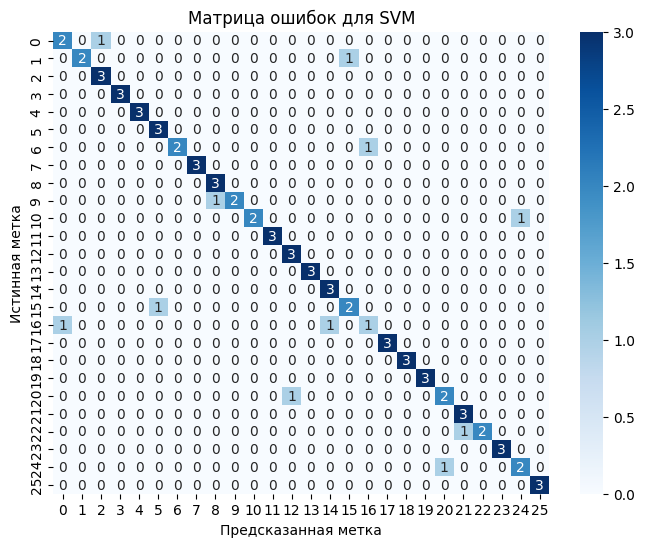

In [23]:
# %% 11. Визуализация результатов: Матрица ошибок для SVM (пример)
cm = confusion_matrix(y_test_labels, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок для SVM")
plt.ylabel("Истинная метка")
plt.xlabel("Предсказанная метка")
plt.show()


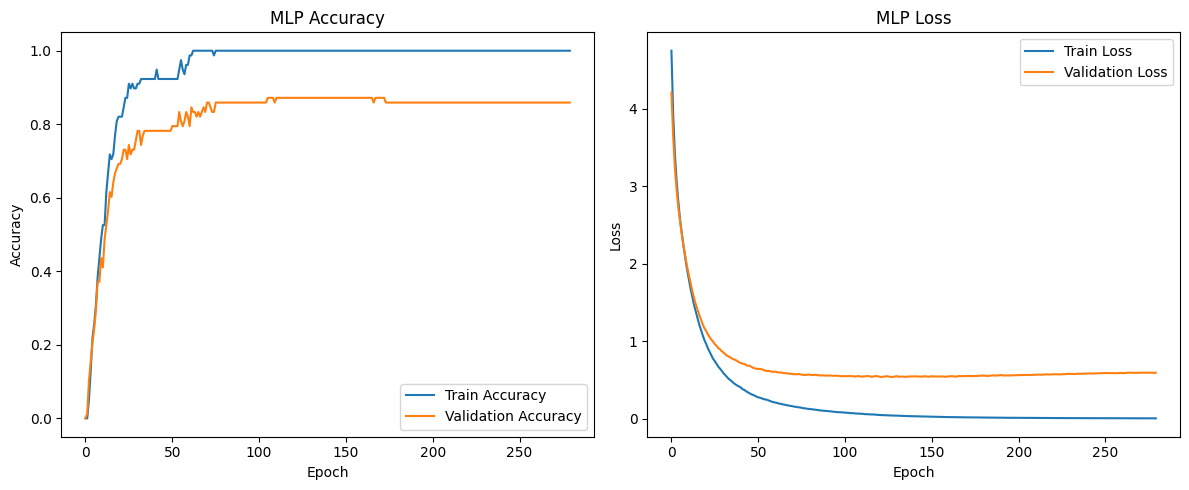

In [24]:
# %% 12. Графики обучения MLP
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
